<a href="https://colab.research.google.com/github/AanchalKankrecha/NYC_taxi_trip_time_prediction/blob/main/Regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Let's Begin!**

**Making important installation**

In [1]:
#Installing haversine to calculate distance between 2 different longitudes and latitudes
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **1.Dataset Loading**






`**Importing necessary libraries** 

In [2]:
#Importing necessary libraries under different alias for convinient usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from haversine import haversine 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

**Hand shaking with google drive**

In [3]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Accessing dataset from google drive**

In [4]:
#Storing NYC taxi dataset in table named df
df=pd.read_csv('/content/drive/MyDrive/Capstone2/NYC_Dataset.csv')

## **2.Overview and understanding of dataset**

In [5]:
# displaying top 5 records of the dataset
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
# displaying bottom 5 records of the dataset
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [7]:
#Shape of the dataset
df.shape

(1458644, 11)

Thus, our dataset contains 1458644 records for 11 different columns.

In [8]:
#to get data type of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [9]:
#Checking for null values in each column
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

None of the column has null values

In [10]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

This are features of our given dataset

In [11]:
# Describing dataset including all columns(Numerical as well as Categorical)
df.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


**Dataset understanding and insights collected yet**

1.   Dataset contains 1458644 records of taxi customers with 11 different  variables.
2.   Out of 11 variables 7 are numerical and 4 are categorical.

    Numerical columns are vendor_id	passenger_count	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	trip_duration.

    Categorical columns are 'id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'.
3. Pasenger count varies from 1 to 9.
4. Minimum Trip duration is 1 second and maximum trip duration is 3526282 seconds which means approx more than 40 days journey which seems to be an outlier. So we are further going to deal with such outliers to make our predictions more precise.





**Hurray!!!**

Our dataset contains no null values.Thus no need to worry about missing value treatment problem.

In [12]:
#number of unique values in each column
df.nunique().reset_index()

,index,0
0,id,1458644
1,vendor_id,2
2,pickup_datetime,1380222
3,dropoff_datetime,1380377
4,passenger_count,10
5,pickup_longitude,23047
6,pickup_latitude,45245
7,dropoff_longitude,33821
8,dropoff_latitude,62519
9,store_and_fwd_flag,2


Above table shows no. of unique values of respective columns

In [13]:
#Displaying unique values of vendor_id,passenger_count,store_and_fwd_count
unique_vendor_id=df['vendor_id'].unique()
unique_passenger=df['passenger_count'].unique()
unique_store_and_fwd_flag=df['store_and_fwd_flag'].unique()
data=[['unique_vendor_id',unique_vendor_id],['unique_passenger',unique_passenger],['unique_store_and_fwd_flag',unique_store_and_fwd_flag]]
unique_df=pd.DataFrame(data,columns=['c_name','unique'])
unique_df

,c_name,unique
0,unique_vendor_id,"[2, 1]"
1,unique_passenger,"[1, 6, 4, 2, 3, 5, 0, 7, 9, 8]"
2,unique_store_and_fwd_flag,"[N, Y]"


Above table depicts unique values of respective categorical columns.

In [14]:
#Converting to datetime format
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],errors='raise',dayfirst=False)
df['dropoff_datetime']=pd.to_datetime(df['pickup_datetime'],errors='raise',dayfirst=False)

In [16]:
#Extracting date,day of the week,month and hour in which pickup is made
df['pickup_date']=df.pickup_datetime.dt.day
#df['dropoff_day']=df.dropoff_datetime.dt.day
df['pickup_weekday']=df.pickup_datetime.dt.weekday
#df['dropoff_weekday']=df.dropoff_datetime.dt.weekday
df['pickup_month']=df.pickup_datetime.dt.month
#df['dropoff_month']=df.dropoff_datetime.dt.month
df['pickup_hour']=df.pickup_datetime.dt.hour
#df['dropoff_hour']=df.dropoff_datetime.dt.hour 

In [17]:
#Function to Calculate distance using cordinates as longitude and lattitude 
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [18]:
#Using distance function
df['distance'] = df.apply(lambda x: calc_distance(x), axis = 1)

In [19]:
# Creating new column for speed of taxi in km per hour
df['speed']=df.distance/(df.trip_duration/3600)

In [20]:
df.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


In [21]:
#Function for Categorizing as morning,afternoon,evening and late night on the basis of hours of the day
def time_of_day(x):
  if x in range(6,12):
    return 'Morning'
  elif x in range(12,16):
    return 'Afternoon'
  elif x in range(16,22):
    return 'Evening'
  else:
    return 'Late night' 

In [52]:
#Applying time of the day function
df['pickup_time_of_day'] = df['pickup_hour'].apply(time_of_day)
#df['dropoff_time_of_day'] = df['dropoff_hour'].apply(time_of_day)

**After understanding the data its time to deep down into it through exploration.**

# **Exploratory Data Analysis**
1. **Univariate:** 
Univariate analysis is the analysis of one variable. It's major purpose is to describe patterns in the data consisting of single variable and gives more concise description of the location, dispersion, and distribution of a variable

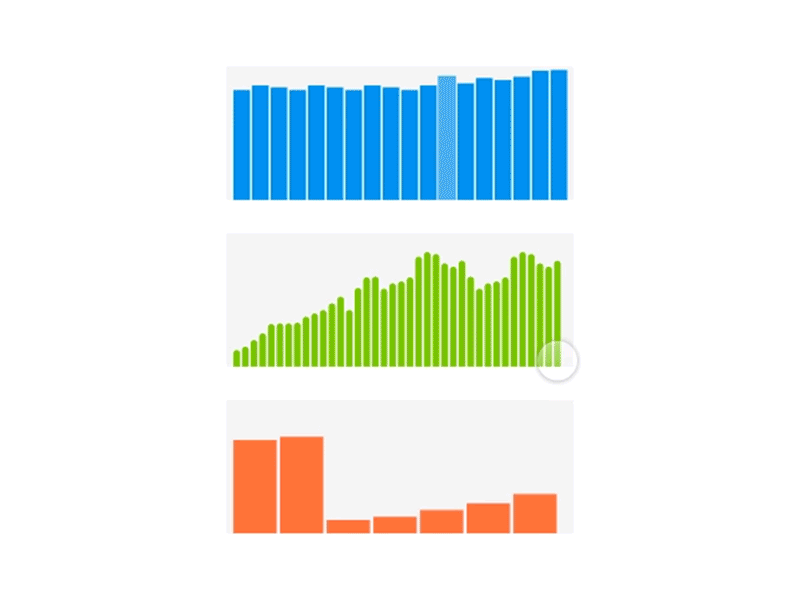

Firstly explore dependent variable and understand how it is distributed:

**trip_duration**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

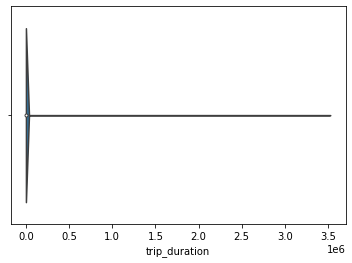

In [ ]:
sns.violinplot(df['trip_duration'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

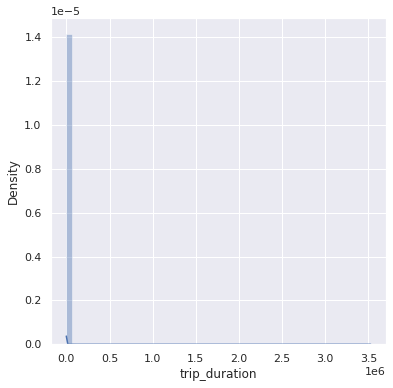

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['trip_duration'])

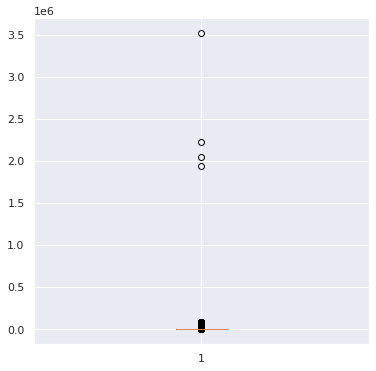

In [ ]:
plt.boxplot(df['trip_duration'])
plt.show()

**Outlier detection:**From the box plot it is clear that some of the data points are nearer to 2*10^6=2000000 = approx 23 days which can be considered as an outlier and none of the journey is for less than 15 seconds atleast. Therefore dropping them


**Outlier Handling**

In [22]:
#Dropping records with outliers in trip duration column
df.drop(df[df['trip_duration']>1000000].index,inplace=True)
df.drop(df[df['trip_duration']<15].index,inplace=True)
df.shape

(1455820, 17)

**passenger_count**

In [23]:
p=df.groupby(by='passenger_count')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count', ylabel='count'>

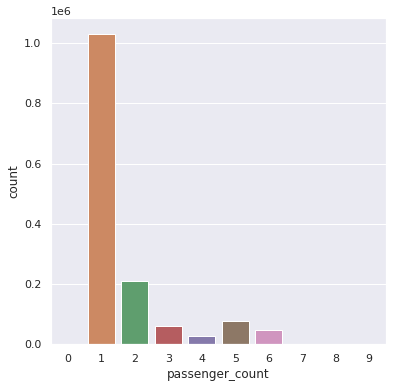

In [ ]:
sns.countplot(df.passenger_count)

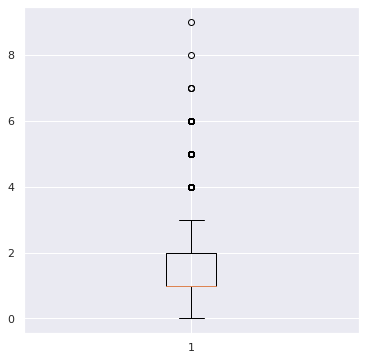

In [ ]:
plt.boxplot(df['passenger_count'])
plt.show()

In [ ]:
a=df['passenger_count'].value_counts()
a

1    1031151
2     210074
5      78016
3      59846
6      48305
4      28390
0         33
7          3
9          1
8          1
Name: passenger_count, dtype: int64

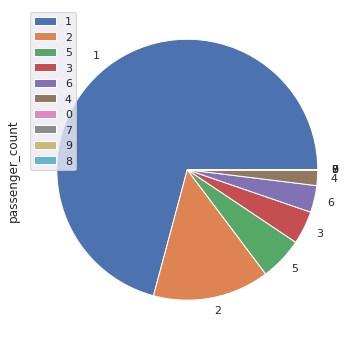

In [ ]:
a.plot(kind='pie')
plt.legend()
plt.show()

Mostly there are rides for single passengers followed by 2 passengers then less rides for 5,3,6,4,0,7,9,8

In [ ]:
df[df['passenger_count']>6]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_weekday,pickup_month,pickup_hour,distance,speed,pickup_time_of_day
433304,id3280610,2,2016-06-07 10:06:24,2016-06-07 10:06:24,7,-74.173668,40.737274,-74.173660,40.737297,N,19,7,1,6,10,0.002625,0.497364,Morning
436047,id2489742,2,2016-06-24 08:09:21,2016-06-24 08:09:21,9,-73.710632,40.671581,-73.710632,40.671581,N,560,24,4,6,8,0.000000,0.000000,Morning
489613,id0506488,2,2016-05-08 22:39:08,2016-05-08 22:39:08,7,-74.039482,40.715031,-74.039482,40.715019,N,15,8,6,5,22,0.001273,0.305406,Late night
824904,id0988237,2,2016-04-23 19:46:08,2016-04-23 19:46:08,7,-73.631149,40.768551,-73.631149,40.768551,N,25,23,5,4,19,0.000000,0.000000,Evening
826064,id1488553,2,2016-01-01 01:15:20,2016-01-01 01:15:20,8,-73.992653,40.768719,-74.041374,40.729954,N,104,1,4,1,1,5.951861,206.025949,Late night


The maximum amount of passengers allowed in a yellow taxicab by law is 4 in a 4 passenger taxicab or 5 passengers in a 5 passenger taxicab, except that an additional passenger must be accepted if such passenger is under the age of seven and is held on the lap of an adult passenger seated in the rear.Thus, total no. of passengers cannot exceed 6.

So we can drop records having more than 6 passengers as they are purely outliers.

None of the ride have no passenger therefore droping records having 0 passenger

In [25]:
#dropping records having more than 6 passengers and having no passengers
df.drop(df[df['passenger_count']>6].index,inplace=True)
df.drop(df[df['passenger_count']==0].index,inplace=True)

In [ ]:
df.shape

(1455782, 18)

Now, no. of records reduced to 1455782

**store_and_fwd_flag**

In [ ]:
df['store_and_fwd_flag'].value_counts()

N    1447798
Y       7984
Name: store_and_fwd_flag, dtype: int64

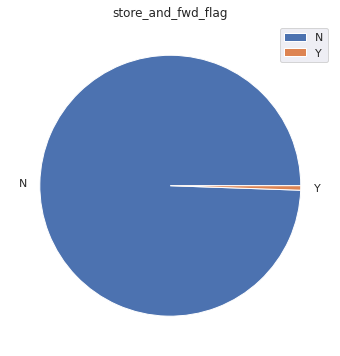

In [ ]:
#pie plot for store_and_fwd_flag
plt.pie(df['store_and_fwd_flag'].value_counts(),labels=['N','Y'])
plt.title('store_and_fwd_flag')
plt.legend()
plt.show()

**vendor_id**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vendor_id', ylabel='count'>

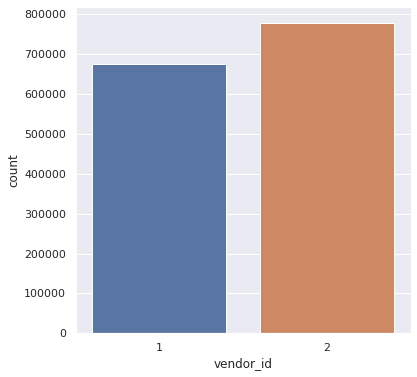

In [ ]:
sns.countplot(df['vendor_id'])


Number of rides by both the vendors have no vast difference

Creating new features from date time by extracting day,weekday,month,year,hour from pickup datetime column

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_weekday,pickup_month,pickup_hour,distance,speed,pickup_time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,0,3,17,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,6,6,0,1.805510,9.803672,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,1,1,11,6.385107,10.822216,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,2,4,19,1.485500,12.465738,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,5,3,13,1.188590,9.836608,Afternoon


In [ ]:
df.shape

(1455782, 18)

In [ ]:
df['pickup_weekday'].value_counts()

4    223119
5    220459
3    218108
2    209794
1    202379
6    194898
0    187025
Name: pickup_weekday, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pickup_weekday', ylabel='count'>

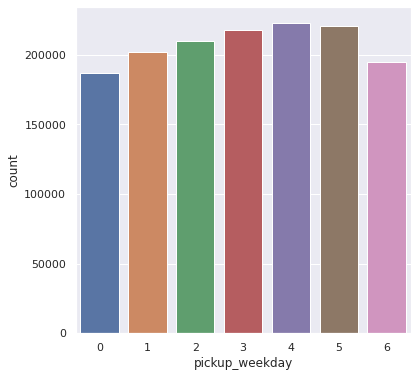

In [ ]:
sns.countplot(df['pickup_weekday'])

Maximum no. of rides were booked on Friday.

<AxesSubplot:ylabel='Density'>

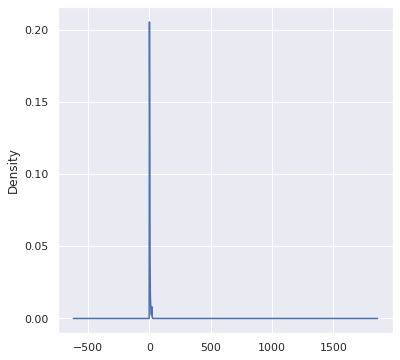

In [ ]:
df['distance'].plot(kind='density')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0e25dedd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0e53c152e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0e25deda30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0e53c15880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e53c15b50>],
 'means': []}

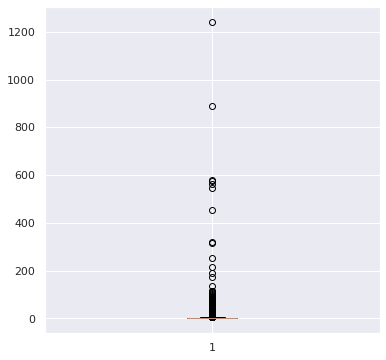

In [ ]:
plt.boxplot(df['distance'])

In [ ]:
df[df['distance']>800]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_weekday,pickup_month,pickup_hour,distance,speed,pickup_time_of_day
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 18:58:53,1,-72.809669,51.881084,-73.987228,40.750599,N,792,7,5,5,18,1240.910391,5640.501776,Evening
974378,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:40:52,5,-71.799896,35.081532,-79.352837,40.436329,N,611,6,2,1,20,891.215334,5251.023246,Evening


From above we can see that 1240 km is covered in 792 seconds i.e. approximately 13min which is impossible for a taxi.

Similarly, it is not possible to cover 891 km in approx 10 min,
Therefore, considering them outlier and droping these records

In [26]:
#dropping records having more than 800 km of travelling
df.drop(df[df['distance']>800].index,inplace=True)

**Hour**

In [27]:
#storing no. of counts of taxi in each hour of the day in a dataframe
name=df.pickup_hour.value_counts().to_frame().reset_index()

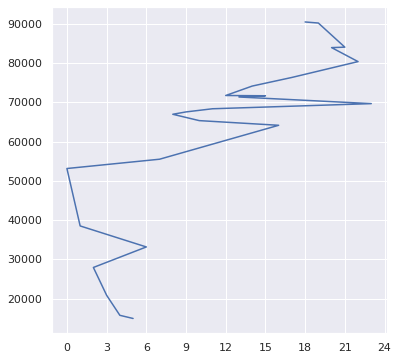

In [ ]:
from matplotlib.ticker import MaxNLocator
x=name['index']
y=name['pickup_hour']
plt.plot(x,y) 
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.show()


pick hour for taxi is 18 i.e around 6:00 p.m. because this is the most often office,coaching, institute leaving time in this corporate world

**2.Bivariate:** Bivariate analysis is one of the statistical analysis where two variables are observed. One variable here is dependent while the other is independent, here we analyse the changes occured between the two variables and to what extent.

**Vendor Id vs Trip Duration
**

In [28]:
'''plt.figure(figsize=(20,20))
for x,y in zip(range(1,len(num_cols)+1),num_cols):
  plt.subplot(6,3,x)
  print(x,y)
  sns.stripplot('trip_duration',y,data=df,palette="Set1")
  plt.xlabel('price range',fontsize=16)
  plt.suptitle('Price range with diffferent numerical variables',fontsize=30,weight='bold')'''

'plt.figure(figsize=(20,20))\nfor x,y in zip(range(1,len(num_cols)+1),num_cols):\n  plt.subplot(6,3,x)\n  print(x,y)\n  sns.stripplot(\'trip_duration\',y,data=df,palette="Set1")\n  plt.xlabel(\'price range\',fontsize=16)\n  plt.suptitle(\'Price range with diffferent numerical variables\',fontsize=30,weight=\'bold\')'

In [ ]:
'''sns.stripplot(x='trip_duration',y='vendor_id',data=df)
plt.show()'''

"sns.stripplot(x='trip_duration',y='vendor_id',data=df)\nplt.show()"

**Trip duration vs vendor id**

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

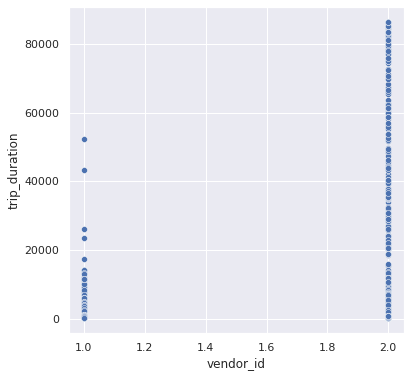

In [ ]:
#Using scatter plot to visualize trip duration of different vendor id
sns.scatterplot(y='trip_duration',x='vendor_id',data=df)

From the above scatter plot we can infer that vendor id 2 has more no. of rides and covering almost all the trip duration time while vendor id 1 has least no. of rides and has low trip duration time.None of the ride by vendor id 1 has time duration more than 60,000 seconds i.e  16 hrs

**Trip duration vs store and forward flag**

In [ ]:
#Using bar plot to visualize trip duration with and without store and forward flag
sns.barplot(y='trip_duration',x='store_and_fwd_flag',data=df)

KeyboardInterrupt: ignored

**Trip duration vs passenger count**

In [ ]:
#Visualizing trip duration with different number of passengers in the taxi
sns.violinplot(y='trip_duration',x='passenger_count',data=df)

From the above violin plot, we can infer that almost all the taxis with different passenger count are densed towards lower trip duration.

Amongst all the violins the width of the violin corresponding to passenger count 1 is maximum shows that most of the taxis have 1 passenger. 

**Trip duration vs Weekday**

In [ ]:
sns.lineplot(y='trip_duration',x='pickup_weekday',data=df) 

In [ ]:

sns.lineplot(x='hour',y='trip_duration',data=df)

Maximum trip duration is around 15 i.e. 3:00 p.m and minimum is around 5:30-6:00 a.m. due to lowest or no traffic in the morning.

In [ ]:
sns.barplot(x='hour',y='trip_duration',data=df)

In [ ]:
sns.scatterplot(x='distance',y='trip_duration',data=df)

Too many data points are clustered near distance zero and having high trip duration which sounds impossible, Therefore exploring them to understand the inconsistent readings!

**Assumption:** A trip which is cancelled after booking can not take more than 3 minute. 

Therefore, considering them as cancelled rides and removing from the dataset. 



In [29]:
# Removing cancelled ride data records 
df=df[~((df['distance']==0) & (df['trip_duration']>60))]


Some of the records showing distance of less than 1 km in more than an hour which is leading to inconsistency. 

So remove those records in order to make our model more precise.  

In [30]:
# Removing inconsistent records 
df=df[~((df['distance']<1) & (df['trip_duration']>3600))] 

<AxesSubplot:xlabel='trip_duration', ylabel='distance'>

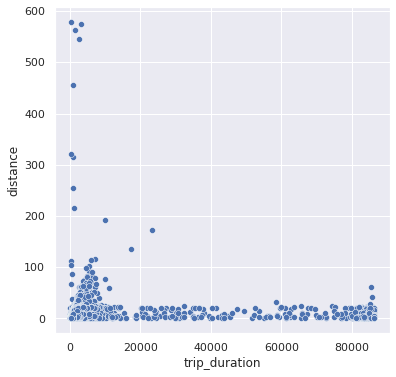

In [ ]:

sns.scatterplot(y='distance',x='trip_duration',data=df)

In [ ]:
sns.swarmplot(x='speed',y='trip_duration',data=df)

In [ ]:
sns.lineplot(x='speed',y='trip_duration',data=df)

In [ ]:
sns.scatterplot(x='speed',y='trip_duration',data=df)

**Mapping**

In [31]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 12.7 MB/s eta 0:00:00


In [32]:
def location_point(set):
    # Import package for map
    from mpl_toolkits.basemap import Basemap
    plt.figure(figsize = (20,20))

    # Set the limits of the map to the minimum and maximum coordinates
    lat_min = df["pickup_latitude"].min() - .2
    lat_max = df["pickup_latitude"].max() + .2
    lon_min = df["pickup_longitude"].min() - .2
    lon_max = df["pickup_longitude"].max() + .2

    # Set the center of the map
    cent_lat = (lat_min + lat_max) / 2
    cent_lon = (lon_min + lon_max) / 2

    #Create the Basemap object with required params.
    map = Basemap(llcrnrlon=lon_min,
                  llcrnrlat=lat_min,
                  urcrnrlon=lon_max,
                  urcrnrlat=lat_max,
                  resolution='l',
                  projection='tmerc',
                  lat_0 = cent_lat,
                  lon_0 = cent_lon)

    #Style the map
    map.drawmapboundary()
    map.drawcoastlines()
    map.fillcontinents()
    map.drawcountries(linewidth=2)
    map.drawstates()


    #Fetch the long and lat in form of array
    long = np.array(df["pickup_longitude"])
    lat = np.array(df["pickup_latitude"])

    x, y = map(long, lat)
    map.plot(x, y,'ro', markersize=2, alpha=1)

    plt.show()

In [ ]:
location_point(df)

Most of the pickup points are near NYC states but some are quiet far too.

In [ ]:
plt.figure(figsize=(10,10))

from mpl_toolkits.basemap import Basemap

# Set the limits of the map to the minimum and maximum coordinates
lat_min = 40.5
lat_max = 40.9
lon_min = -74.2
lon_max = -73.7

# Set the center of the map
cent_lat = (lat_min + lat_max) / 2
cent_lon = (lon_min + lon_max) / 2

#Create the Basemap object with required params.
map = Basemap(llcrnrlon=lon_min,
              llcrnrlat=lat_min,
              urcrnrlon=lon_max,
              urcrnrlat=lat_max,
              resolution='l',
              projection='tmerc',
              lat_0 = cent_lat,
              lon_0 = cent_lon)

#Style the map
# map.drawcounties()

#Fetch the long and lat in form of array
long = np.array(df["pickup_longitude"])
lat = np.array(df["pickup_latitude"])

x, y = map(long, lat)
map.plot(x, y,'bo', markersize=1, alpha=1)
plt.xticks()
plt.show()

**Outlier detection and handling**


In [33]:
num_col=df.describe().columns

In [ ]:
for i in num_col:
  sns.boxplot(df[i])
  plt.show()

In [34]:
def check_outliers(start,end,step,column):
  for i in range(start,end,step):
    a = column.values
    a=np.sort(a)
    print('{} percentile value is {}'.format(i,int(column.quantile(i/100))))
  print('{} percentile value is {}'.format(100,a[-1]))

  

In [ ]:
check_outliers(0,100,9,df['trip_duration'])

0 percentile value is 15
9 percentile value is 236
18 percentile value is 330
27 percentile value is 418
36 percentile value is 508
45 percentile value is 605
54 percentile value is 715
63 percentile value is 845
72 percentile value is 1009
81 percentile value is 1240
90 percentile value is 1634
99 percentile value is 3415
100 percentile value is 86392


In [ ]:
check_outliers(90,100,1,df['trip_duration'])

**Inference:** Since 99% of the values are below 3415, 

So it is better to drop 1% of the values greater than 3415 considering them as outlier.

In [35]:
df = df.drop(df[df['trip_duration']>3415].index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

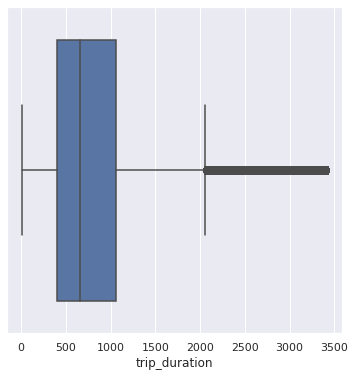

In [ ]:
sns.boxplot(df['trip_duration'])

In [ ]:
check_outliers(0,100,9,df['distance'])

0 percentile value is 0
9 percentile value is 0
18 percentile value is 1
27 percentile value is 1
36 percentile value is 1
45 percentile value is 1
54 percentile value is 2
63 percentile value is 2
72 percentile value is 3
81 percentile value is 4
90 percentile value is 7
99 percentile value is 20
100 percentile value is 578.8436170414994


In [38]:
df = df.drop(df[df['distance']>20].index)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_weekday,pickup_month,pickup_hour,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,0,3,17,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,6,6,0,1.805510,9.803672
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,1,1,11,6.385107,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,2,4,19,1.485500,12.465738
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,5,3,13,1.188590,9.836608


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance'>

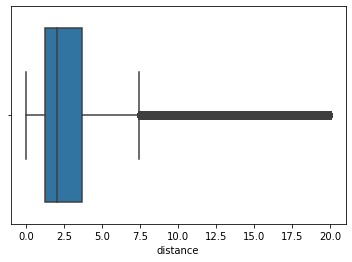

In [39]:
sns.boxplot(df['distance'])

In [ ]:
check_outliers(0,10,1,df['speed'])

0 percentile value is 0
1 percentile value is 2
2 percentile value is 3
3 percentile value is 4
4 percentile value is 4
5 percentile value is 5
6 percentile value is 5
7 percentile value is 5
8 percentile value is 6
9 percentile value is 6
100 percentile value is 1408.1067829566764


In [ ]:
check_outliers(90,100,1,df['speed'])

90 percentile value is 23
91 percentile value is 24
92 percentile value is 25
93 percentile value is 26
94 percentile value is 27
95 percentile value is 28
96 percentile value is 29
97 percentile value is 31
98 percentile value is 34
99 percentile value is 39
100 percentile value is 1408.1067829566764


In [40]:
df = df.drop(df[df['speed']>39].index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='speed'>

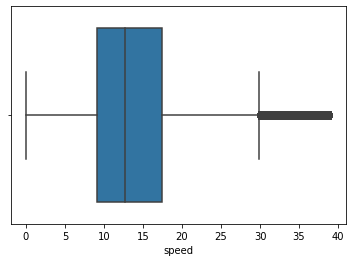

In [41]:
sns.boxplot(df['speed'])

In [42]:
df=df.drop(df[df['speed']<=4].index)

From the domain knowledge we know that if taxi speed is less than or 4 i.e covering only 4 km in an hour which is even worst than an padestrian.

Therefore dropping those records.

**Which outlier detection method is used and why?**



*   Box plot and percentile method is used.
*   Box plot is the best way to visualize and detect outliers in the dataset.
*   Percentile method is used to keep an eye from where the outliers are started or to generallise after which percentage a value to be considered as an outlier.


After removing outliers now have a look on distribution of dependent variable


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

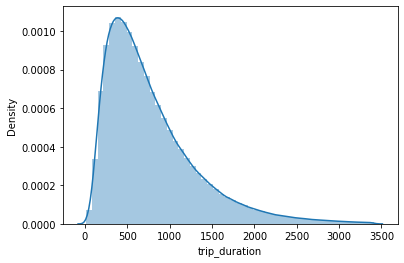

In [43]:
sns.distplot(df['trip_duration'])

From the plot it is clear that data is **right skewed**

Therefore, applying  sqrt transformation to make it somehow normally distributed

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

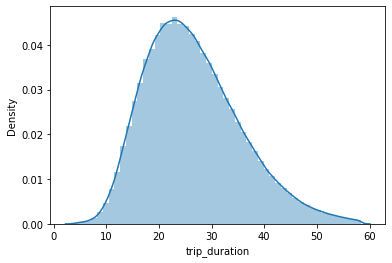

In [44]:
sns.distplot(np.sqrt(df['trip_duration']))

This is quiet similar to normal distribution.

In [45]:
df['transformed_trip_duration']=np.sqrt(df['trip_duration'])

In [46]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_weekday', 'pickup_month',
       'pickup_hour', 'distance', 'speed', 'transformed_trip_duration'],
      dtype='object')

In [47]:
df1=df

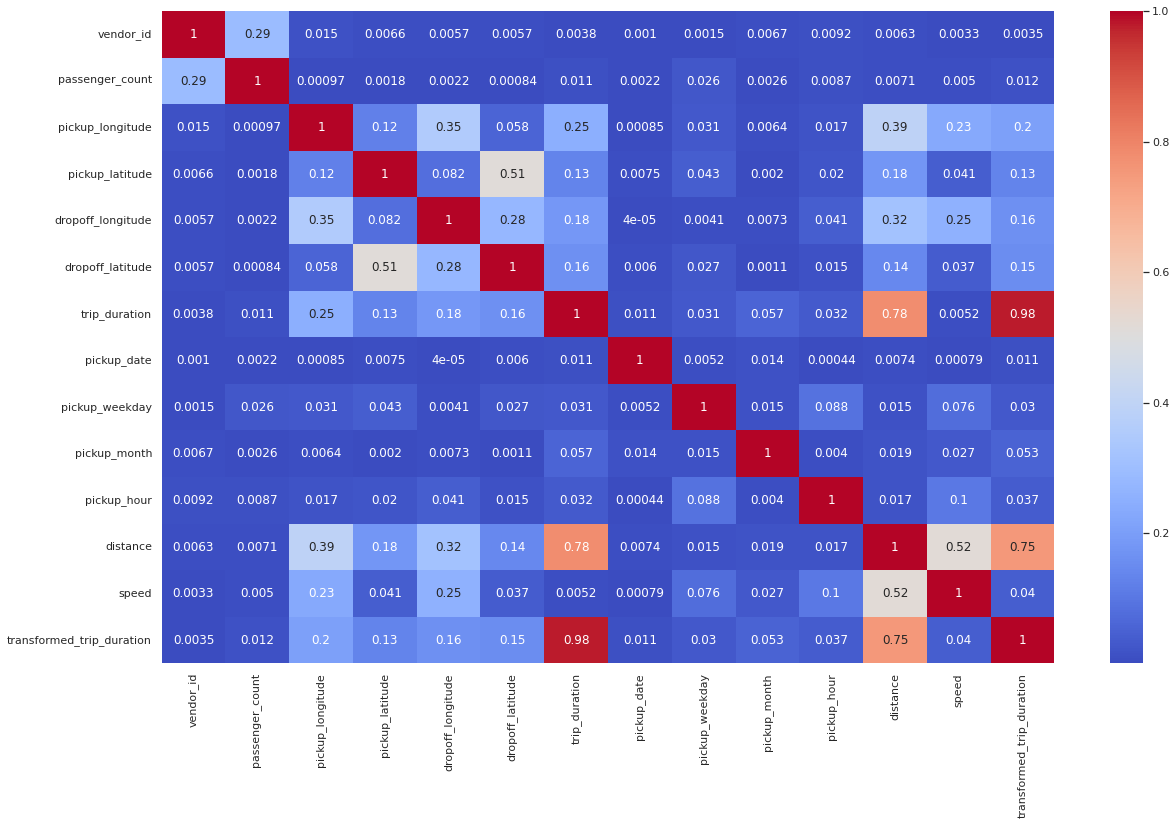

In [ ]:
plt.figure(figsize=(20,12))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

**Data preparation for modelling**

Only numerical columns are included, its time to convert categoriacal columns to numerical so that we can step towards modelling.

**MODEL 1: Multiple linear regression** 

**Encoding:**


store and fwd count -**label encoding**

vendor id,pickup_hour and pickup_time_of_day- **One hot encoding**



In [49]:
#Assigning 1 to Y and 0 to N in store_and_fwd_flag 
df1['store_and_fwd_flag']=df1['store_and_fwd_flag'].apply(lambda x:1 if x=='Y' else '0')

In [53]:
#creating dummy variables for vendor id,pickup_hour and pickup_time_of_day
df1 = pd.get_dummies(df , columns=['vendor_id','pickup_time_of_day','pickup_hour'],prefix=['vendor','day_time','pickup_hour'])

In [55]:
df1.columns

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_date', 'pickup_weekday', 'pickup_month', 'distance', 'speed',
       'transformed_trip_duration', 'vendor_1', 'vendor_2',
       'day_time_Afternoon', 'day_time_Evening', 'day_time_Late night',
       'day_time_Morning', 'pickup_hour_0', 'pickup_hour_1', 'pickup_hour_2',
       'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6',
       'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9', 'pickup_hour_10',
       'pickup_hour_11', 'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14',
       'pickup_hour_15', 'pickup_hour_16', 'pickup_hour_17', 'pickup_hour_18',
       'pickup_hour_19', 'pickup_hour_20', 'pickup_hour_21', 'pickup_hour_22',
       'pickup_hour_23'],
      dtype='object')

In [56]:
df1.drop(['id', 'pickup_datetime', 'dropoff_datetime','pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude','pickup_date','pickup_month','trip_duration'],axis=1,inplace=True)

In [58]:
y=df1['transformed_trip_duration']
X=df1.loc[:,df1.columns!='transformed_trip_duration']
#df=df[~((df['distance']<1) & (df['trip_duration']>3600))] 

In [ ]:
X.head()

,passenger_count,store_and_fwd_flag,pickup_weekday,distance,speed,vendor_1,vendor_2,day_time_Afternoon,day_time_Evening,day_time_Late night,...,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23
0,1,0,0,1.498523,11.856445,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,6,1.805510,9.803672,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,6.385107,10.822216,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,2,1.485500,12.465738,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,5,1.188590,9.836608,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Spliting dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [62]:
# Fitting linear regression model
linr_model = LinearRegression().fit(x_train, y_train)
linr_model
 

LinearRegression()

Linear regression model 1 is fitted in approx.**7 seconds** which is quiet lesser for such large dataset.

In [63]:
print(linr_model.coef_)
linr_model.intercept_

[ 1.55179948e-02 -5.31766823e+10 -1.32355495e-02  3.24531659e+00
 -7.98170617e-01 -3.91039750e+10 -3.91039750e+10 -2.44106435e+10
 -3.06477158e+10 -3.41067290e+10 -2.35852837e+10  1.28852994e+09
  1.28852994e+09  1.28852994e+09  1.28852994e+09  1.28852994e+09
  1.28852994e+09 -9.23291531e+09 -9.23291531e+09 -9.23291531e+09
 -9.23291531e+09 -9.23291531e+09 -9.23291531e+09 -8.40755553e+09
 -8.40755553e+09 -8.40755553e+09 -8.40755553e+09 -2.17048325e+09
 -2.17048325e+09 -2.17048325e+09 -2.17048325e+09 -2.17048325e+09
 -2.17048325e+09  1.28852994e+09  1.28852994e+09]


71922174071.05942

In [68]:
y_pred=linr_model.predict(x_test)

Applying back transformation before calculating R2 as squaring y_test and y_pred as we had used sqrt values for model fitting.

In [69]:
r2_score(y_test**2,y_pred**2)

0.7466570771762582

Here R2 value is 0.75 approx which means that 75% of the model is being explained by the Model 1.

**Model 2: Multiple linear regression**

> **Encoding**
   1. pickup_time_of+the_day: Label encoding



In [70]:
df2=df

In [72]:
df2.drop(['id', 'pickup_datetime', 'dropoff_datetime','pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude','pickup_date','pickup_month','speed','trip_duration'],axis=1,inplace=True)

KeyError: ignored

In [73]:
label_encoder = preprocessing.LabelEncoder()
df2['pickup_time_of_day']= label_encoder.fit_transform(df2['pickup_time_of_day'])

In [74]:
df2.head()

,vendor_id,passenger_count,store_and_fwd_flag,pickup_weekday,pickup_hour,distance,transformed_trip_duration,pickup_time_of_day
0,2,1,0,0,17,1.498523,21.330729,1
1,1,1,0,6,0,1.805510,25.748786,2
2,2,1,0,1,11,6.385107,46.086874,3
3,2,1,0,2,19,1.485500,20.712315,1
4,2,1,0,5,13,1.188590,20.856654,0


In [76]:
#Assigning values to dependent and independent variables
y2=df2['transformed_trip_duration']
X2=df2.loc[:,df2.columns!='transformed_trip_duration']
#df=df[~((df['distance']<1) & (df['trip_duration']>3600))] 

In [77]:
#Splitting dataset into training and testing set
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2,test_size=0.2,random_state=1)

In [79]:
#Fitting linear regression model
linr_model = LinearRegression().fit( x2_train, y2_train)
linr_model
 

LinearRegression()

In [80]:
print(linr_model.coef_)
linr_model.intercept_

[-6.31707792e-02  5.49000231e-02 -2.22044605e-16 -1.89037351e-01
  3.48120310e-02  2.32932887e+00 -4.38316403e-01]


20.103082562841198

In [81]:
y2_pred=linr_model.predict(x2_test)

In [83]:
#R2 as evaluating regression model 
r2_score(y2_test**2,y2_pred**2)

0.5094119825004231

R2 is 0.51 approx this means that model only explians 51% which is even less than Model 1

**MODEL 3: Linear regression on Min Max scaled data**

In [85]:
tdf=df2
tdf.head()

,vendor_id,passenger_count,store_and_fwd_flag,pickup_weekday,pickup_hour,distance,transformed_trip_duration,pickup_time_of_day
0,2,1,0,0,17,1.498523,21.330729,1
1,1,1,0,6,0,1.805510,25.748786,2
2,2,1,0,1,11,6.385107,46.086874,3
3,2,1,0,2,19,1.485500,20.712315,1
4,2,1,0,5,13,1.188590,20.856654,0


In [86]:
tx=tdf.loc[:,tdf.columns!='transformed_trip_duration']
ty=tdf['transformed_trip_duration']

In [87]:
#Applying Min Max transformation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(tx) 
tx.loc[:,:] = scaled_values
tx.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,vendor_id,passenger_count,store_and_fwd_flag,pickup_weekday,pickup_hour,distance,pickup_time_of_day
0,1.0,0.0,0.0,0.000000,0.739130,0.074151,0.333333
1,0.0,0.0,0.0,1.000000,0.000000,0.089513,0.666667
2,1.0,0.0,0.0,0.166667,0.478261,0.318686,1.000000
3,1.0,0.0,0.0,0.333333,0.826087,0.073499,0.333333
4,1.0,0.0,0.0,0.833333,0.565217,0.058641,0.000000


In [88]:
#Spliting dataset into train test
tx_train, tx_test, ty_train, ty_test = train_test_split(tx, ty, test_size=0.2,random_state=1)

In [89]:
#Fitting linear regression model on transformed data
t_linr_model = LinearRegression().fit( tx_train, ty_train)
t_linr_model
 

LinearRegression()

In [90]:
print(t_linr_model.coef_)
t_linr_model.intercept_

[-6.31707792e-02  2.74500116e-01  6.92779167e-14 -1.13422410e+00
  8.00676713e-01  4.65474014e+01 -1.31494921e+00]


20.133843538585914

In [91]:
ty_pred=t_linr_model.predict(tx_test)

In [93]:
#calculating R2 on back transformed data
r2_score(ty_test**2,ty_pred**2)

0.5094119825004234

R2 for model 3 is approx 51% which is similar to model 2. Thus min max transformation didn't resulted in better modelling.


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
linr_model = GradientBoostingRegressor(random_state=0).fit(x2_train, y2_train)
print(linr_model.score(x2_train, y2_train))


0.745155965331797


0.7450610805106601

In [ ]:
linr_model.score(x2_test,y2_test**2)

-1.9296662295132911

In [ ]:

y2_pred=linr_model.predict(x2_test)

In [ ]:
r2_score(y2_test**2,y2_pred**2)

0.7236456864774883

In [ ]:
#Defining function to fit model

def fit_mod(model, x_train, x_test, y_train, y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''
  global y_pred
  # Fitting the model
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  a,p = y_test,y_pred 

  return y_pred

In [ ]:
# Minimum number of samples required to split a node:
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [8,16,22]

# Maximum depth of trees:
max_depth = [6,8,10,15]


In [ ]:
def Get_model(model,x_train,x_test,y_train,y_test):
      
    fit_mod(model, x_train, x_test, y_train, y_test)
    ''' Storing predictions for Evaluation '''
    Y_pred_train = model.predict(x_train)
    Y_pred_test = model.predict(x_test)

In [ ]:
#Defining Model 
regressor = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
dtr = RandomizedSearchCV(regressor, param_distributions = grid, scoring = 'neg_mean_squared_error', cv=5,random_state=6,verbose=True,n_jobs=-1)

#Fitting the model 
Get_model(dtr, x_train, x_test, y_train, y_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print('The best fit alpha value is found out to be :' ,dtr.best_params_)
print('The R2 score using the same alpha is :', dtr.best_score_)

The best fit alpha value is found out to be : {'min_samples_split': 10, 'min_samples_leaf': 16, 'max_depth': 15}
The R2 score using the same alpha is : -0.011332166172197252


In [ ]:
#Defining Model 
regressor = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
dtr = RandomizedSearchCV(regressor, param_distributions = grid, scoring = 'R2_score', cv=5,random_state=6,verbose=True,n_jobs=-1)

#Fitting the model 
Get_model(dtr, x_train, x_test, y_train, y_test)

NameError: ignored

Random Forest

In [ ]:
# Number of trees in random forest
n_estimators = [50,100,150]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10,15]

# Minimum number of samples required to split a node
min_samples_split = [5, 10,15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10,15]

In [ ]:
regressor = RandomForestRegressor(random_state=2,oob_score=False,verbose=True)


# Hyperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
rf = RandomizedSearchCV(regressor, param_distributions = grid, scoring = 'neg_mean_squared_error', cv=2,random_state=6,verbose=True,n_jobs=-1)

Get_model(rf, x_train, x_test, y_train, y_test)

In [ ]:
print('The best fit alpha value is found out to be :' ,rf.best_params_)
print('The R2 score using the same alpha is :', rf.best_score_)



In [ ]:
regressor_rfraw = RandomForestRegressor(n_jobs=-1)

In [ ]:
regressor_rfraw.fit(x_train,y_train)

In [ ]:
y_pred_rfraw = regressor_rfraw.predict(x_test)

In [ ]:
regressor_rfraw.score(x_test,y_test)

In [ ]:
regressor_rfraw.score(x_train,y_train)

In [ ]:

rf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf1.fit(x_train, y_train)

In [ ]:
rf1 = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf1.fit(x_train, y_train)

In [ ]:
rf1.score(x_test,y_test)

In [ ]:
rf1 = RandomForestRegressor(n_estimators = 5, random_state = 42)
# Train the model on training data
rf1.fit(x_train, y_train)

In [ ]:
rf1.score(x_test,y_test)

In [ ]:
rf1 = RandomForestRegressor(n_estimators = 2, random_state = 42)
# Train the model on training data
rf1.fit(x_train, y_train)

In [ ]:
rf1.score(x_test,y_test)

In [ ]:
rf2 = RandomForestRegressor()
# Train the model on training data
rf2.fit(x_train, y_train)
rf2.score(x_test,y_test)

In [ ]:
y_pred=rf2.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
rf3 = RandomForestRegressor(n_estimators = 2, random_state = 42)
# Train the model on training data
rf3.fit(x2_train, y2_train)

In [ ]:
rf3.score(x2_test,y2_test)

In [ ]:
df4=df
df4.head()
x=df4[['vendor_id',	'passenger_count','store_and_fwd_flag','pickup_weekday',	'pickup_hour',	'distance',	'speed',	'pickup_time_of_day']]
x.head()

In [ ]:
x[x['passenger_count']==np.NaN & x['distance']==np.NaN]

In [ ]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x.iloc[:,:] = pd.DataFrame(scaler.fit_transform(x.iloc[:,:].to_numpy()))
print(x)'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values
df.head()

In [ ]:
df.info()

In [ ]:
df4.shape

In [ ]:
x.info()

In [ ]:
x[x['passenger_count'].isnull()]

In [ ]:
sns.distplot(np.sqrt(df['trip_duration']))

In [ ]:
df['trip_duration']=np.sqrt(df['trip_duration'])
df.head()